In [1]:
%matplotlib inline

from pylab import *
import matplotlib.pyplot as plt


Initialisation
==============

* importing pyAgrum
* importing pyAgrum.lib tools
* loading a BN

In [2]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

## Create a first BN : bn

In [3]:
bn=gum.loadBN("res/asia.bif")
# randomly re-generate parameters for every Conditional Probability Table
bn.generateCPTs() 
bn

<pyAgrum.pyAgrum.BayesNet_double; proxy of <Swig Object of type 'gum::BayesNet< double > *' at 0x7f2584297e40> >

## Create a second BN : bn2

In [4]:
bn2=gum.loadBN("res/asia.bif")
bn2.generateCPTs()
bn2

<pyAgrum.pyAgrum.BayesNet_double; proxy of <Swig Object of type 'gum::BayesNet< double > *' at 0x7f25840ae7e0> >

## bn vs bn2 : different parameters

In [5]:
gnb.sideBySide(bn.cpt(3),bn2.cpt(3),
              captions=["a CPT in bn","same CPT in bn2"])

## Exact and (Gibbs) approximated KL-divergence 

In order to compute KL-divergence, we just need to be sure that the 2 distributions are defined on the same domain (same variables, etc.)

<h3>Exact KL</h3>


In [6]:
g1=gum.BruteForceKL(bn,bn2)
print(g1.compute())

{'bhattacharya': 0.7591845628972526, 'klQP': 3.988191690662652, 'errorQP': 0, 'hellinger': 1.0314572845319523, 'klPQ': 5.89342989297614, 'errorPQ': 0}


If the models are not on the same domain :

In [8]:
bn_different_domain=gum.loadBN("res/alarm.dsl")

# g=gum.BruteForceKL(bn,bn_different_domain) # a KL-divergence between asia and alarm ... :(
#
# would cause
#---------------------------------------------------------------------------
#OperationNotAllowed                       Traceback (most recent call last)
#
#OperationNotAllowed: this operation is not allowed : KL : the 2 BNs are not compatible (not the same vars : visit_to_Asia?)

<h3>Gibbs-approximated KL</h3>

There is something wrong with <em>Bhattacharya</em> computations...


In [9]:
g=gum.GibbsKL(bn,bn2)
g.setVerbosity(True)
g.setMaxTime(120)
g.setBurnIn(5000)
g.setEpsilon(1e-7)
g.setPeriodSize(500)

In [10]:
print(g.compute())
print("Computed in {0} s".format(g.currentTime()))

{'bhattacharya': -12.861363292911012, 'klQP': 3.9127948726808954, 'errorQP': 0, 'hellinger': 1.0275952469709622, 'klPQ': 5.891757175166883, 'errorPQ': 0}
Computed in 38.569453739 s


--
stopped with epsilon=1e-07
--
Temps de calcul : 38.569453739
Nombre d'itérations : 824000


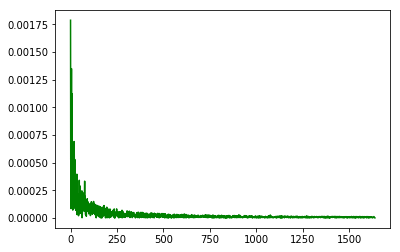

In [11]:
print("--")

print(g.messageApproximationScheme())
print("--")

print("Temps de calcul : {0}".format(g.currentTime()))
print("Nombre d'itérations : {0}".format(g.nbrIterations()))

p=plot(g.history(), 'g')

### Animation of Gibbs KL

Since it may be difficult to know what happens during approximation algorithm, pyAgrum allows to follow the iteration using animated matplotlib figure

In [12]:
g=gum.GibbsKL(bn,bn2)
g.setMaxTime(60)
g.setBurnIn(500)
g.setEpsilon(1e-7)
g.setPeriodSize(5000)

{'bhattacharya': -12.7694869001954,
 'errorPQ': 0,
 'errorQP': 0,
 'hellinger': 1.0207897622121174,
 'klPQ': 5.89461412104155,
 'klQP': 3.780040953262612}

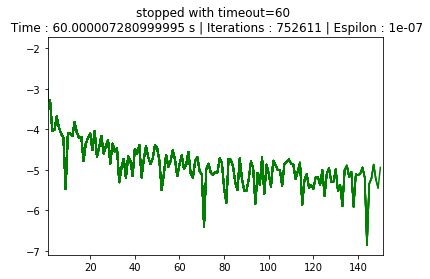

In [13]:
gnb.animApproximationScheme(g) # logarithmique scale for Y
g.compute()